In [93]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [94]:
dataset = pd.read_csv('D:\projects\ML\Linear-Regression\data\energydata_complete.csv')

In [95]:
dataset.shape

(19735, 29)

In [96]:
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [97]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [98]:
column_names = {'date':'Date', 'Appliances':'Appliances', 'lights':'Lights', 'T1':'Temp_kitchen','RH_1':'Humidity_kitchen',
                'T2':'Temp_LR','RH_2':'Humidity_LR','T3':'Temp_Laundry','RH_3':'Humidity_Laundry','T4':'Temp_Office',
                'RH_4':'Humidity_Office', 'T5':'Temp_Bathroom','RH_5':'Humidity_Bathroom','T6': 'Temp_Outside_Build',
                'RH_6':'Humidity_OutsideBuild', 'T7': 'Temp_IR', 'RH_7':'Humidity_IR','T8':'Temp_TR2','RH_8':'Humidity_TR2',
                'T9':'Temp_PR', 'RH_9':'Humidity_PR', 'T_out':'Temp_Outside', 'Press_mm_hg':'Pressure', 
                'RH_out':'Humidity_Outside', 'Windspeed':'Windspeed','Visibility':'Visibility', 'Tdewpoint':'Tdewpoint',
                'rv1':'Random_Var1','rv2':'Random_Var2'
}

In [99]:
dataset = dataset.rename(columns=column_names)

In [100]:
dataset.columns

Index(['Date', 'Appliances', 'Lights', 'Temp_kitchen', 'Humidity_kitchen',
       'Temp_LR', 'Humidity_LR', 'Temp_Laundry', 'Humidity_Laundry',
       'Temp_Office', 'Humidity_Office', 'Temp_Bathroom', 'Humidity_Bathroom',
       'Temp_Outside_Build', 'Humidity_OutsideBuild', 'Temp_IR', 'Humidity_IR',
       'Temp_TR2', 'Humidity_TR2', 'Temp_PR', 'Humidity_PR', 'Temp_Outside',
       'Pressure', 'Humidity_Outside', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Random_Var1', 'Random_Var2'],
      dtype='object')

In [101]:
dataset.describe()

,Appliances,Lights,Temp_kitchen,Humidity_kitchen,Temp_LR,Humidity_LR,Temp_Laundry,Humidity_Laundry,Temp_Office,Humidity_Office,...,Temp_PR,Humidity_PR,Temp_Outside,Pressure,Humidity_Outside,Windspeed,Visibility,Tdewpoint,Random_Var1,Random_Var2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [102]:
#check for NaN to clean data
dataset.isnull().any()

Date                     False
Appliances               False
Lights                   False
Temp_kitchen             False
Humidity_kitchen         False
Temp_LR                  False
Humidity_LR              False
Temp_Laundry             False
Humidity_Laundry         False
Temp_Office              False
Humidity_Office          False
Temp_Bathroom            False
Humidity_Bathroom        False
Temp_Outside_Build       False
Humidity_OutsideBuild    False
Temp_IR                  False
Humidity_IR              False
Temp_TR2                 False
Humidity_TR2             False
Temp_PR                  False
Humidity_PR              False
Temp_Outside             False
Pressure                 False
Humidity_Outside         False
Windspeed                False
Visibility               False
Tdewpoint                False
Random_Var1              False
Random_Var2              False
dtype: bool

In [103]:
new_dataset = dataset.drop(columns=['Date','Lights'])

In [104]:
new_dataset.columns

Index(['Appliances', 'Temp_kitchen', 'Humidity_kitchen', 'Temp_LR',
       'Humidity_LR', 'Temp_Laundry', 'Humidity_Laundry', 'Temp_Office',
       'Humidity_Office', 'Temp_Bathroom', 'Humidity_Bathroom',
       'Temp_Outside_Build', 'Humidity_OutsideBuild', 'Temp_IR', 'Humidity_IR',
       'Temp_TR2', 'Humidity_TR2', 'Temp_PR', 'Humidity_PR', 'Temp_Outside',
       'Pressure', 'Humidity_Outside', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Random_Var1', 'Random_Var2'],
      dtype='object')

In [105]:
dataset.shape

(19735, 29)

In [106]:
new_dataset.shape

(19735, 27)

In [107]:
scaler = MinMaxScaler()

In [108]:
normalized_new_dataset = pd.DataFrame(scaler.fit_transform(new_dataset), columns=new_dataset.columns)

In [109]:
X = normalized_new_dataset.drop(columns='Appliances')

In [110]:
X.columns

Index(['Temp_kitchen', 'Humidity_kitchen', 'Temp_LR', 'Humidity_LR',
       'Temp_Laundry', 'Humidity_Laundry', 'Temp_Office', 'Humidity_Office',
       'Temp_Bathroom', 'Humidity_Bathroom', 'Temp_Outside_Build',
       'Humidity_OutsideBuild', 'Temp_IR', 'Humidity_IR', 'Temp_TR2',
       'Humidity_TR2', 'Temp_PR', 'Humidity_PR', 'Temp_Outside', 'Pressure',
       'Humidity_Outside', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Random_Var1', 'Random_Var2'],
      dtype='object')

In [111]:
Y = normalized_new_dataset['Appliances']

In [112]:
Y.shape

(19735,)

In [113]:
Y

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [114]:
X

,Temp_kitchen,Humidity_kitchen,Temp_LR,Humidity_LR,Temp_Laundry,Humidity_Laundry,Temp_Office,Humidity_Office,Temp_Bathroom,Humidity_Bathroom,...,Temp_PR,Humidity_PR,Temp_Outside,Pressure,Humidity_Outside,Windspeed,Visibility,Tdewpoint,Random_Var1,Random_Var2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [115]:
X_val = X.values

In [116]:
X_val

array([[0.32734952, 0.56618659, 0.22534529, ..., 0.53846154, 0.26544891,
        0.26544891],
       [0.32734952, 0.54132648, 0.22534529, ..., 0.53393665, 0.37208289,
        0.37208289],
       [0.32734952, 0.53050179, 0.22534529, ..., 0.52941176, 0.57284766,
        0.57284766],
       ...,
       [0.91974657, 0.53866618, 0.69265118, ..., 0.89894419, 0.58397859,
        0.58397859],
       [0.91974657, 0.54949087, 0.67705355, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.91974657, 0.53875791, 0.66617051, ..., 0.8959276 , 0.68239057,
        0.68239057]])

In [117]:
Y_val = Y.values

In [118]:
Y_val

array([0.04672897, 0.04672897, 0.03738318, ..., 0.24299065, 0.38317757,
       0.39252336])

<AxesSubplot:xlabel='Appliances'>

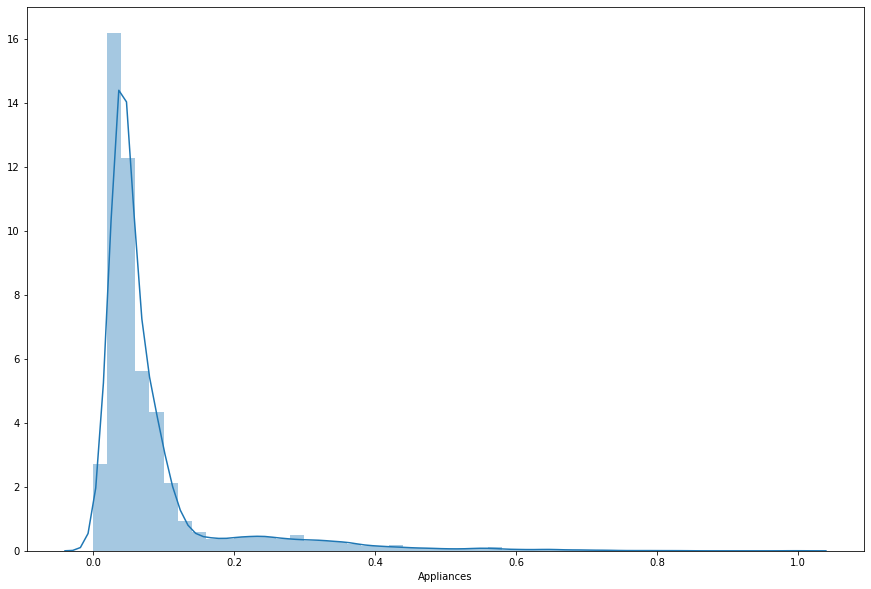

In [119]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(Y)

<AxesSubplot:>

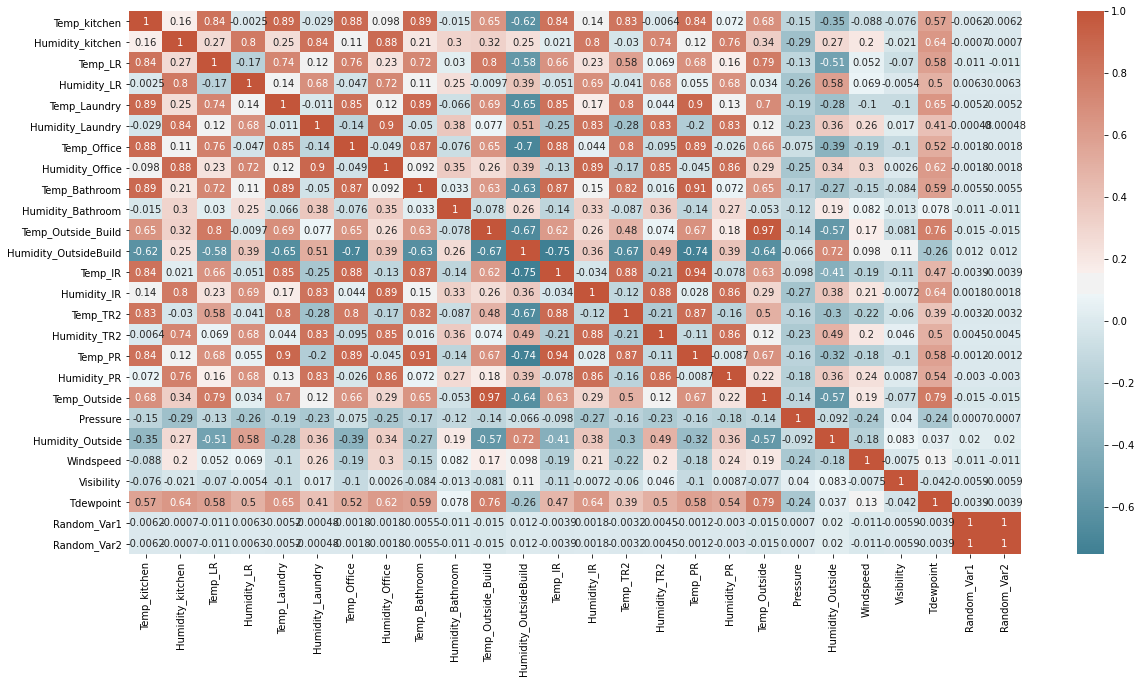

In [120]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_val, Y_val, test_size=0.3, random_state=42)

In [122]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [123]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Temp_kitchen,-3.281051e-03
Humidity_kitchen,5.536328e-01
Temp_LR,-2.360944e-01
Humidity_LR,-4.566669e-01
Temp_Laundry,2.906065e-01
Humidity_Laundry,9.597915e-02
Temp_Office,2.896459e-02
Humidity_Office,2.637145e-02
Temp_Bathroom,-1.570138e-02
Humidity_Bathroom,1.599656e-02


In [124]:
Y_pred = regressor.predict(X_test)

In [125]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1= df.sample(35, random_state=7)
df1

,Actual,Predicted
1971,0.056075,0.080936
4355,0.074766,0.192752
2027,0.046729,0.090709
5651,0.037383,0.075214
2680,0.028037,0.039691
1634,0.037383,0.062183
737,0.168224,0.078738
3690,0.018692,0.064777
5413,0.074766,0.187297
700,0.140187,0.094112


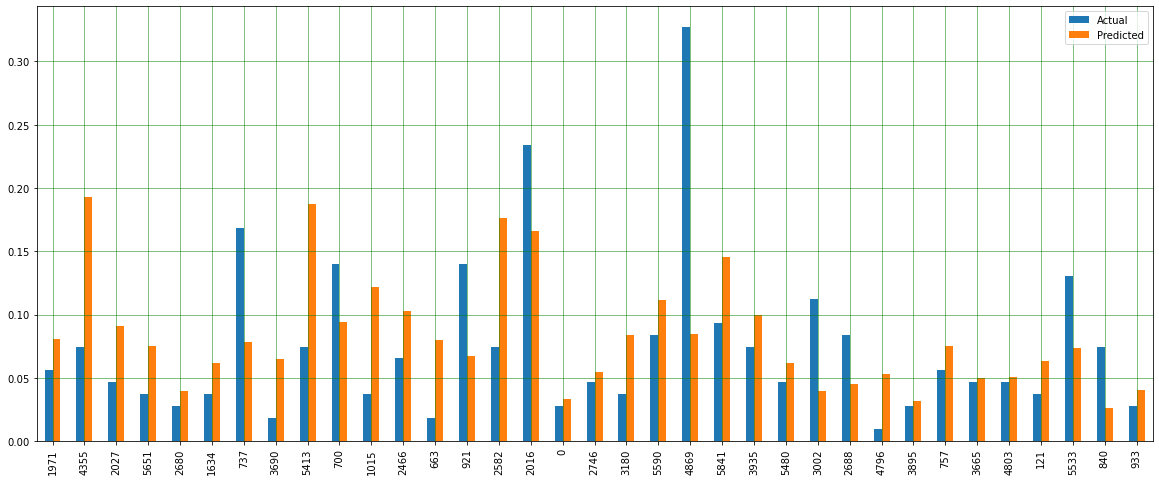

In [126]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [127]:
#Evaluate the performance of the algorithm
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, Y_pred),3))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_pred),3))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),3))
print('R-Squared:', round(metrics.r2_score(Y_test, Y_pred),3))
print('Residual Sum of Squares:', round(np.sum(np.square(Y_test - Y_pred)),3))

Mean Absolute Error: 0.05
Mean Squared Error: 0.008
Root Mean Squared Error: 0.088
R-Squared: 0.149
Residual Sum of Squares: 45.345


In [128]:
lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X_train,Y_train)
train_score0001=lasso0001.score(X_train,Y_train)
test_score0001=lasso0001.score(X_test,Y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)

In [129]:
print("training score for alpha=0.001:", train_score0001) 
print("test score for alpha =0.001: ", test_score0001)
print("number of features used: for alpha =0.001:", coeff_used0001)

training score for alpha=0.001: 0.02499234354320612
test score for alpha =0.001:  0.026800880567125818
number of features used: for alpha =0.001: 4


In [130]:
Y1_pred = lasso0001.predict(X_test)

In [131]:
#Evaluate the performance of the algorithm
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, Y1_pred),3))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y1_pred),3))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y1_pred)),3))
print('R-Squared:', round(metrics.r2_score(Y_test, Y1_pred),3))
print('Residual Sum of Squares:', round(np.sum(np.square(Y_test - Y1_pred)),3))

Mean Absolute Error: 0.055
Mean Squared Error: 0.009
Root Mean Squared Error: 0.094
R-Squared: 0.027
Residual Sum of Squares: 51.853
